In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinv,null_space
from RateDistortion import *

In [2]:
r = 0.4
R = np.array([[2,r],[r,2]])
S2 = np.array([[1,0],[0,1]])
S3 = np.array([[1,0],[0,1],[0.5,0.5]])
px = np.array([0.5,0.5])

In [3]:
dxy2 = getFullDistortionFunction(R,S2)
r2 = getRD(px,dxy2)
dxy3 = getFullDistortionFunction(R,S3)
r3 = getRD(px,dxy3)

In [4]:
# A seed is set so that the results are reproducible
# Change the seed to see different random instances
g = np.random.default_rng(seed=1)

numPoints = 4000
opPoints = np.zeros((4,numPoints))
for i in range(numPoints):
  pygx3_a = np.array(g.uniform(size=(3,2))) * 0.3 # each element in the first two rows is restricted to [0,0.2]
  for j in [0,1]:
    pygx3_a[2,j] = 1-pygx3_a[0,j]-pygx3_a[1,j]
  pxy3_a = pygx3_a @ np.diag(px)
  
  pygx3_b = np.array(g.uniform(size=(3,2)))
  pygx3_b[2,:] = pygx3_b[2,:] * 0
  for j in [0,1]:
    pygx3_b[:,j] = pygx3_b[:,j] / np.sum(pygx3_b[:,j]) # columns must sum to 1
  pxy3_b = pygx3_b @ np.diag(px)
  
  opPoints[0,i] = np.sum(dxy3 * pxy3_a)
  opPoints[1,i] = MI(pxy3_a)
  opPoints[2,i] = np.sum(dxy3 * pxy3_b)
  opPoints[3,i] = MI(pxy3_b)

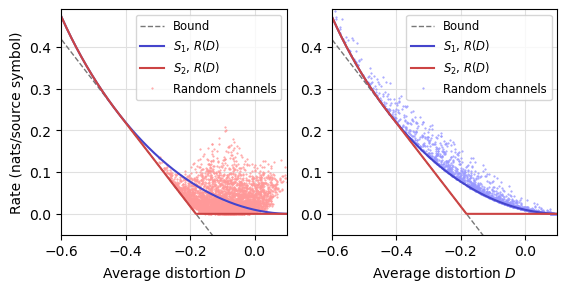

In [5]:
fig,ax = plt.subplots(1,2)


# line for the bound
dmin = -0.7
dmax = 0

Qinv = np.diag(inv(R) @ np.ones(np.shape(R)[0]))
Q = inv(Qinv)

L = getAvgLambdaStar(Q,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

# first subplot

ax[0].plot(opPoints[0,:],opPoints[1,:],linestyle='',
         marker='.',markersize=1,color='#ff9999',label='Random channels')
ax[0].plot(D_v,B_v,linestyle='--',linewidth=1,color='#777777',label='Bound')
ax[0].plot(r2['Dmax_v'],r2['r_v'],color='#4444cc',label='$S_1$, $R(D)$')
ax[0].plot(r3['Dmax_v'],r3['r_v'],color='#cc4444',label='$S_2$, $R(D)$')

ax[0].set_ylabel('Rate (nats/source symbol)')
ax[0].set_xlabel('Average distortion $D$')

ax[0].axis([-0.6,0.1,-0.05,0.49])
ax[0].set_aspect(1/ax[0].get_data_ratio())

h,l = ax[0].get_legend_handles_labels()
order = [1,2,3,0]
ax[0].legend([h[i] for i in order],[l[i] for i in order],fontsize='small')
ax[0].grid(visible=True,color='#e0e0e0')


# second subplot

ax[1].plot(opPoints[2,:],opPoints[3,:],linestyle='',
         marker='.',markersize=1,color='#9999ff',label='Random channels')
ax[1].plot(D_v,B_v,linestyle='--',linewidth=1,color='#777777',label='Bound')
ax[1].plot(r2['Dmax_v'],r2['r_v'],color='#4444cc',label='$S_1$, $R(D)$')
ax[1].plot(r3['Dmax_v'],r3['r_v'],color='#cc4444',label='$S_2$, $R(D)$')

ax[1].set_xlabel('Average distortion $D$')

ax[1].axis([-0.6,0.1,-0.05,0.49])
ax[1].set_aspect(1/ax[0].get_data_ratio())

h,l = ax[1].get_legend_handles_labels()
order = [1,2,3,0]
ax[1].legend([h[i] for i in order],[l[i] for i in order],fontsize='small')
ax[1].grid(visible=True,color='#e0e0e0')


fig.savefig('Figure7.pdf',bbox_inches='tight')